# Singular Value Decompositions

In [1]:
import numpy as np
import pandas as pd

### Initialize the matrix

In [2]:
mat = np.array([[4, 2, 2], 
                [3, 4, 1],
                [6, 7, 2]])

In [3]:
U, s, Vh = np.linalg.svd(mat, full_matrices=False)

In [4]:
U

array([[-0.39238083,  0.91021976, -0.13242839],
       [-0.43543486, -0.31063767, -0.84492646],
       [-0.810206  , -0.273869  ,  0.51822968]])

In [5]:
s

array([11.624865  ,  1.96337343,  0.08762725])

In [6]:
Vh

array([[-0.66556161, -0.7052076 , -0.24435626],
       [ 0.54281675, -0.68208838,  0.49000553],
       [ 0.51222819, -0.1934882 , -0.83677034]])

### Are the column vectors orthgonal?

In [7]:
dotp = np.round(np.dot(U[:, 0], U[:, 1]), 2)
dotp

0.0

In [8]:
# Check if the vector is a unit vector
is_orthogonal = np.isclose(dotp, 0.0)

print("Are the vectors orthogonal to each other?", is_orthogonal)

Are the vectors orthogonal to each other? True


In [9]:
# Calculate the Euclidean norm
norm = np.linalg.norm(U[:, 0])
norm

0.9999999999999997

### Are the vectors unit vectors?

In [10]:
# Check if the vector is a unit vector
is_unit_vector = np.isclose(norm, 1.0)

print("Is the vector a unit vector?", is_unit_vector)

Is the vector a unit vector? True


In [11]:
norm_A = np.linalg.norm(U[:, 0])
norm_B = np.linalg.norm(U[:, 1])

cosine_similarity = dotp / (norm_A * norm_B)

print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.0


### What happens if the first eigen vectors and values are taken?

In [15]:
mat_1 = U[:, :1] @ np.diag(s[:1]) @ Vh[:1, :]
np.round(mat_1, 1)

array([[3. , 3.2, 1.1],
       [3.4, 3.6, 1.2],
       [6.3, 6.6, 2.3]])

### What happens if the two eigen vectors and values are taken?

In [19]:
mat_2 = mat_1 = U[:, :2] @ np.diag(s[:2]) @ Vh[:2, :]
np.round(mat_2, 1)

array([[4. , 2. , 2. ],
       [3. , 4. , 0.9],
       [6. , 7. , 2. ]])

### What happens if the all eigen vectors and values are taken?

In [22]:
mat_3 = U @ np.diag(s) @ Vh
np.round(mat_3, 1)

array([[4., 2., 2.],
       [3., 4., 1.],
       [6., 7., 2.]])

# Application of SVD - Image Compression

In [31]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

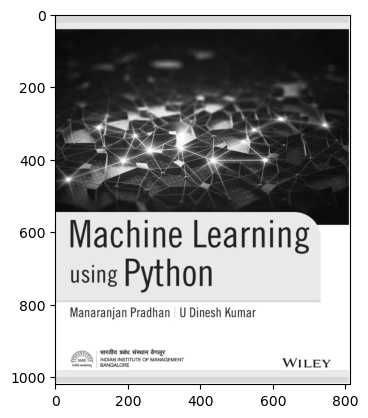

In [36]:
book = Image.open('book.png')
booknp = np.array(book)
grayscale = booknp[:, :, :1]
plt.imshow( grayscale, cmap='gray' );

### SVD of Image Matrix

In [15]:
U_vec, sigma, V_vec = np.linalg.svd(np.matrix(grayscale))

### Using the first vectors

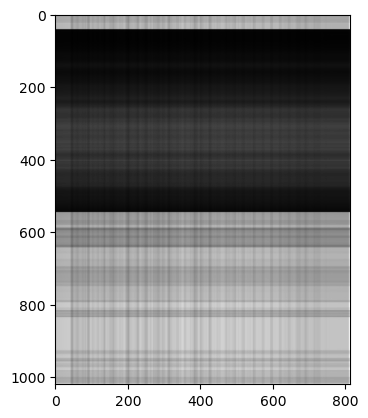

In [16]:
image_1_vec = U_vec[:, :1] @ np.diag(sigma[:1]) @ V_vec[:1, :]
plt.imshow(image_1_vec, cmap='gray');

### Using 10 vectors

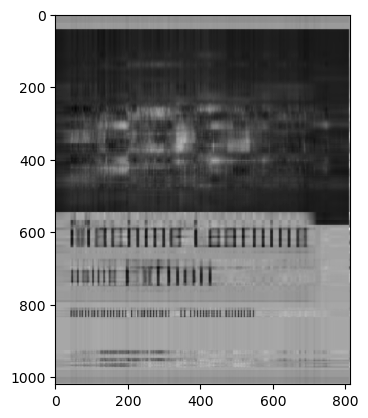

In [17]:
image_1_vec = U_vec[:, :10] @ np.diag(sigma[:10]) @ V_vec[:10, :]
plt.imshow(image_1_vec, cmap='gray');

### Using 50 vectors

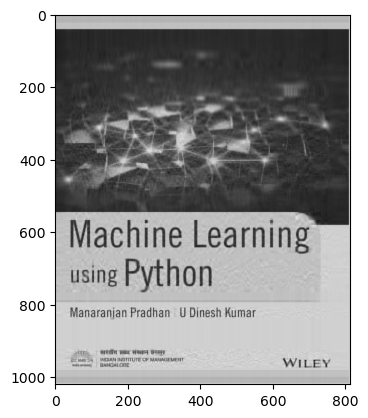

In [22]:
image_1_vec = U_vec[:, :50] @ np.diag(sigma[:50]) @ V_vec[:50, :]
plt.imshow(image_1_vec, cmap='gray');

In [23]:
sigma.shape

(814,)

## How much information is explained and how much is lost?

In [24]:
total_variance = np.sum( sigma )

In [25]:
np.round(sigma, 2)[0:10]

array([150783.67,  19684.62,  13846.15,   9944.42,   9388.48,   8918.55,
         8733.82,   7851.47,   7127.39,   6962.94])

In [26]:
np.round(sigma, 2)[-10:]

array([0.31, 0.3 , 0.29, 0.26, 0.23, 0.2 , 0.19, 0.  , 0.  , 0.  ])

In [27]:
var_explained = np.round([(eig_val/total_variance) for eig_val in sigma], 3)

In [28]:
var_explained_cumm = np.cumsum( var_explained )

In [32]:
var_explained_df = pd.DataFrame( {'component': range(1,275), 
                              'variance': var_explained[0:274],
                              'var_cumsum': var_explained_cumm[0:274]} )

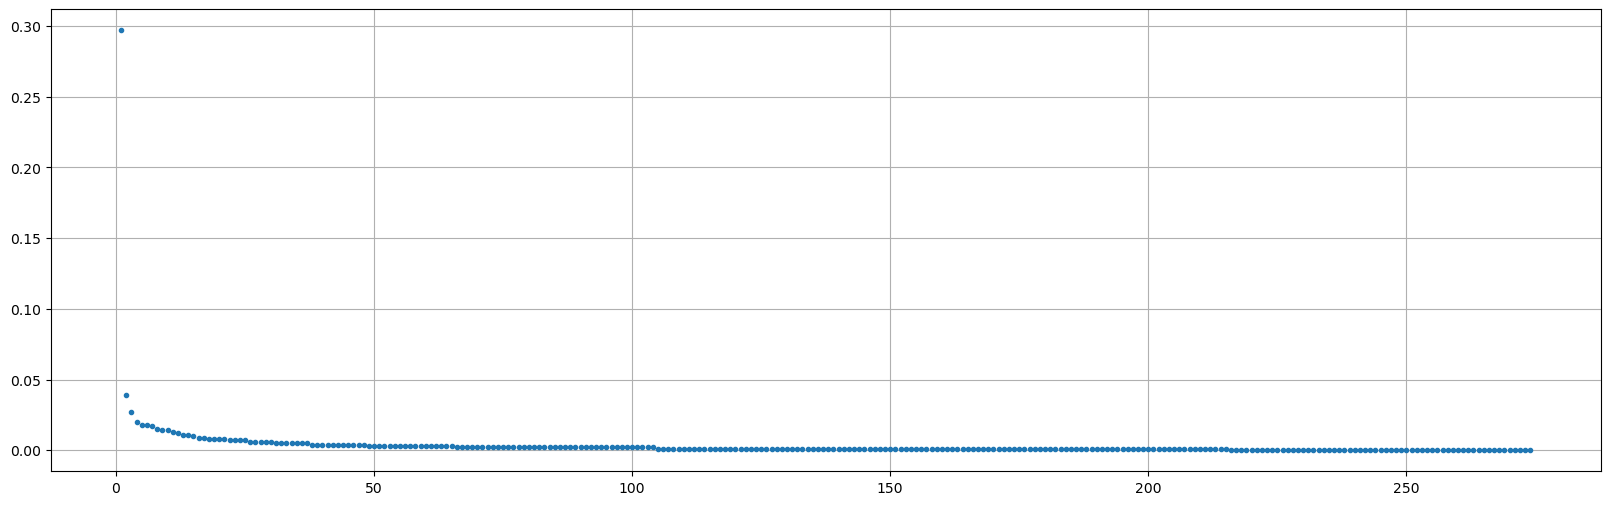

In [33]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.variance, 
         '.');

In [34]:
var_explained_df[0:20]

,component,variance,var_cumsum
0,1,0.297,0.297
1,2,0.039,0.336
2,3,0.027,0.363
3,4,0.020,0.383
4,5,0.018,0.401
5,6,0.018,0.419
6,7,0.017,0.436
7,8,0.015,0.451
8,9,0.014,0.465
9,10,0.014,0.479


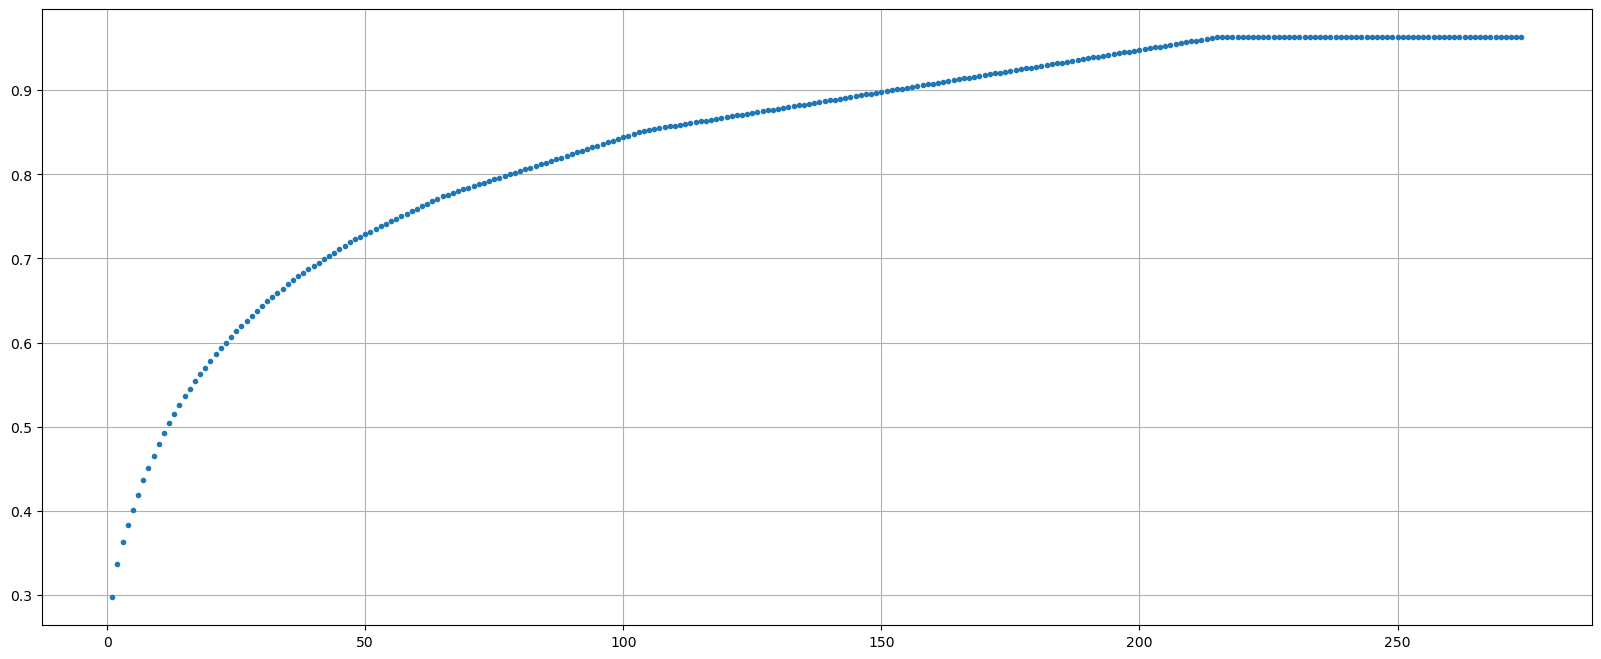

In [35]:
plt.figure(figsize = (20, 8))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.var_cumsum,
         '.');

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Load the dataset
url = "beer.csv"
beer_df = pd.read_csv(url)

In [39]:
beer_df.shape

(20, 5)

In [38]:
features = ['calories', 'sodium', 'alcohol', 'cost']

In [41]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the selected features
pca.fit(beer_df[features])

# Transform the data to the new 2D space
beer_2d = pca.transform(beer_df[features])

# Create a DataFrame for the transformed data
beer_2d_df = pd.DataFrame(beer_2d, columns=['D1', 'D2'])

In [43]:
explained_variance = np.round(pca.explained_variance_ratio_, 2)
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.96 0.04]


/Users/manaranjanp/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manaranjanp/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


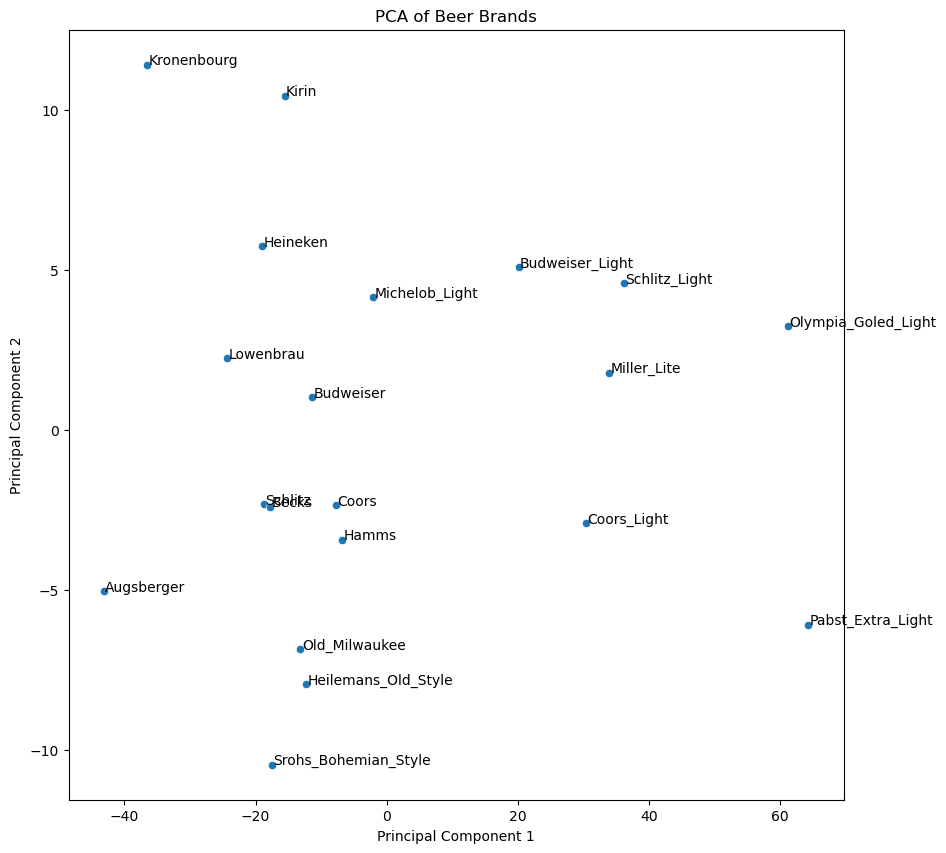

In [45]:
# Plotting the beer brands in 2D space
plt.figure(figsize=(10, 10))
sn.scatterplot(data=beer_2d_df, x='D1', y='D2')

# Adding annotations for each beer brand
for line in range(beer_df.shape[0]):
    plt.text(beer_2d_df.D1[line] + 0.2, beer_2d_df.D2[line], beer_df.name[line],
             horizontalalignment='left', size='medium', color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beer Brands')
plt.show();